In [1]:
"""
AdPro Assignment 1 - Group_C
----------------------------
Diego Bellon 45637
Hannah Hoehnke 44536
Kevin Cabrera 44406
Marc Serafin 44832
Sophie Schmitz 45718
Wiebke Wegener 44354
----------------------------
Notebook to demo the handler.py code, by importing 'Handler' Class and showcasing
all of the methods.
Including the Class with the initialization and 7 methods.
    1. set_df(df_path):
        attributes the 'data_frame' to the instance
    2. download_url(url, save_path):
        downloads the Bike-Sharing-Dataset as a .zip file in 'downloads' file
    3. extract_zip(file_name):
        extract_zip: reads the .csv data in .zip file
    4. create_correlation_matrix(correlation_attributes):
        create_correlation_matrix: plots a correlation matrix of month, humidity,
        weather situation, temperature, windspeed, and total number of bike rentals in the data.
    5. plot():
        allows input of specific week, which is then plotted and the selected data frame displayed
    6. plot_average_total_rentals():
        barplot expected rentals by month
    7. forecast(i_month):
        plot expected weekly rentals by hour for every month and
        find synchronicities through plotting a Fourtier transformation.
"""
# Our company ValleyCobra is participating in a two-day hackathon.
# Our mission is to promote bicyle mobility.
# Using bike-sharing rental data we are aiming to analyze the fluctualtions in
# bike rentals, in order to improve the distribution process of bikes in rental shops.
#
# First, we import all of the neccessary packages and the Handler class
# with the relevant methods.
import sys

sys.path.insert(1, "../functions")
from handler import Handler

# We then create and call the 'Handler' Class and name it 'handler'.
handler = Handler()

# We call the download_url method in the class and
# download the database .zip file in the given directory,
# where the url and the local file path are given as parameters.
# (UPPER_CASE in the demo since non-variable, but lower_case in the .py)
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
SAVE_PATH = "../downloads/Bike-Sharing-Dataset.zip"
handler.download_url(URL, SAVE_PATH)

downloading zip now.


In [2]:
# Here we unzip the downloaded data by giving the file path as a parameter
# to the method.
FILE_NAME = "../downloads/Bike-Sharing-Dataset.zip"
handler.extract_zip(FILE_NAME)

File Name                                             Modified             Size
Readme.txt                                     2013-12-20 13:29:02         5607
day.csv                                        2013-12-20 12:10:44        57569
hour.csv                                       2013-12-20 12:10:44      1156736
Extracting all the files now...
Done!


In [3]:
# We read the hour.csv file and attribute it to the data_frame.
DF_PATH = "../data/hour.csv"
handler.set_df(DF_PATH)

In [4]:
# Now we print the attribute 'data_frame' DataFrame as an overview.
handler.data_frame

instant    datetime  season  year  month  hr  holiday  \
2011-01-01 00:00:00        1  2011-01-01       1     0      1   0        0   
2011-01-01 01:00:00        2  2011-01-01       1     0      1   1        0   
2011-01-01 02:00:00        3  2011-01-01       1     0      1   2        0   
2011-01-01 03:00:00        4  2011-01-01       1     0      1   3        0   
2011-01-01 04:00:00        5  2011-01-01       1     0      1   4        0   
...                      ...         ...     ...   ...    ...  ..      ...   
2012-12-31 19:00:00    17375  2012-12-31       1     1     12  19        0   
2012-12-31 20:00:00    17376  2012-12-31       1     1     12  20        0   
2012-12-31 21:00:00    17377  2012-12-31       1     1     12  21        0   
2012-12-31 22:00:00    17378  2012-12-31       1     1     12  22        0   
2012-12-31 23:00:00    17379  2012-12-31       1     1     12  23        0   

                     weekday  workingday  weather_condition  temp   atemp  \
2011-01-01 00:00:00        6           0                  1  0.24  0.2879   
2011-01-01 01:00:00        6           0                  1  0.22  0.2727   
2011-01-01 02:00:00        6           0                  1  0.22  0.2727   
2011-01-01 03:00:00        6           0                  1  0.24  0.2879   
2011-01-01 04:00:00        6           0                  1  0.24  0.2879   
...                      ...         ...                ...   ...     ...   
2012-12-31 19:00:00        1           1                  2  0.26  0.2576   
2012-12-31 20:00:00        1           1                  2  0.26  0.2576   
2012-12-31 21:00:00        1           1                  1  0.26  0.2576   
2012-12-31 22:00:00        1           1                  1  0.26  0.2727   
2012-12-31 23:00:00        1           1                  1  0.26  0.2727   

                     humidity  windspeed  casual  registered  count  week  
2011-01-01 00:00:00      0.81     0.0000       3          13     16     0  
2011-01-01 01:00:00      0.80     0.0000       8          32     40     0  
2011-01-01 02:00:00      0.80     0.0000       5          27     32     0  
2011-01-01 03:00:00      0.75     0.0000       3          10     13     0  
2011-01-01 04:00:00      0.75     0.0000       0           1      1     0  
...                       ...        ...     ...         ...    ...   ...  
2012-12-31 19:00:00      0.60     0.1642      11         108    119   104  
2012-12-31 20:00:00      0.60     0.1642       8          81     89   104  
2012-12-31 21:00:00      0.60     0.1642       7          83     90   104  
2012-12-31 22:00:00      0.56     0.1343      13          48     61   104  
2012-12-31 23:00:00      0.65     0.1343      12          37     49   104  

[17379 rows x 18 columns]

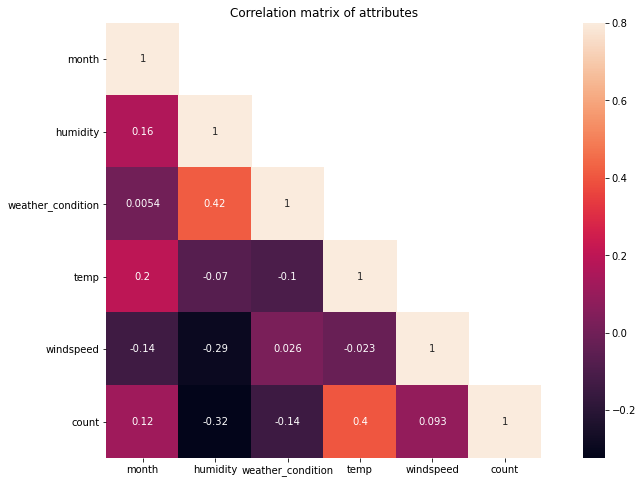

In [5]:
# Here, we plot a correlation matrix between the attributes
# month, humidity, weather situation, temperature, windspeed,
# and total number of bike rentals in the data.
correlation_attributes = ["month", "humidity", "weather_condition", "temp", "windspeed", "count"]
handler.create_correlation_matrix(correlation_attributes)

In [6]:
# As a result we can clearly see that some variables such as
# "weather_condition" and "humidity" are strongly correlated,
# which was to be expected.
# The most relevant findings are the positive correlation between bike rentals
# ("counts") and temperature ("temp"), and the negative correlation between
# bike rentals and humidity.
# The correlation between higher temperature with increasing rentals,
# but also more humidity with less rentals should therefore be taking into account.

Enter a week number between 0-102: 1


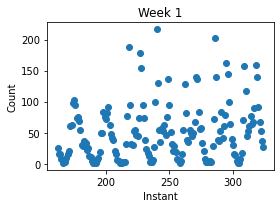

In [7]:
# Now, we call a method that allows you to pick a week number between 0 and 102 weeks.
# If the chosen number is not in the [0, 102] range the method will raise a ValueError.
# If everything is OK, the method should then plot the chosen week.
# (It's fine to leave the instant number as long as the datetime is used in the forecast.)
handler.plot()

In [8]:
# There are sequencial drops at 7 periods during the week,
# most likely due to fewer rentals at night.

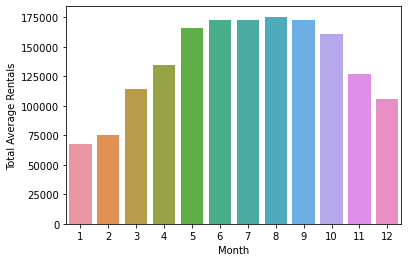

In [9]:
# We then plot the average total rentals by month of the year.
handler.plot_average_total_rentals()

In [10]:
# There seem to be far more rentals during the summer months between May-Saptember,
# with its peak in August at around 175.000 rentals.
# If you remember our correlation matrix it makes sense,
# because with better weather the number of rented bicycles also increase.

Month as a number between 1-12: 1


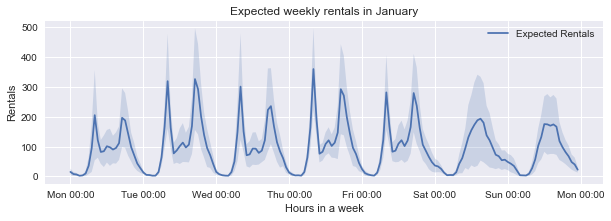

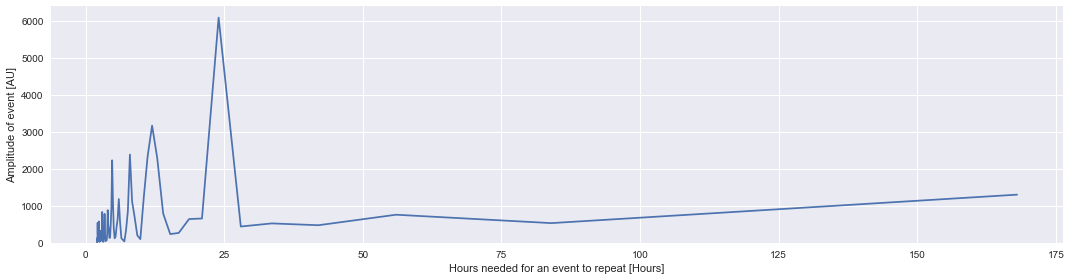

In [11]:
# Finally we plot the expected weekly bike rentals for a given month in a year,
# by inputting the number of the month to be plotted.
# Furthermore we analyze reacurring sequences with a Fourtier transformation.
i_month = input("Month as a number between 1-12:")
handler.forecast(i_month)

In [12]:
# Regular steep peaks on work days during morning and afternoon hours week
# indicate a high usage
# most likely during to and from work, as well as a small increase, 
# during lunchbreak hours.
# Weekends seem to follow a differnt patterns with only one peak during midday,
# following a steady concave function form.
# To make sure of the cyclic behaviour the Fourtier transformation also
# indicates reacurrences after around 24 hours, but also at around 7-8 hours,
# indicating the importance of work trips.

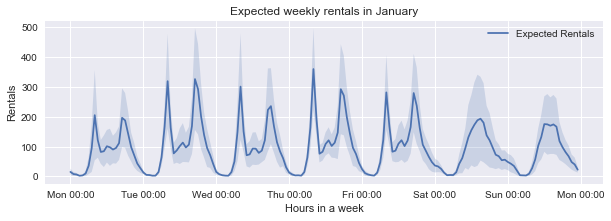

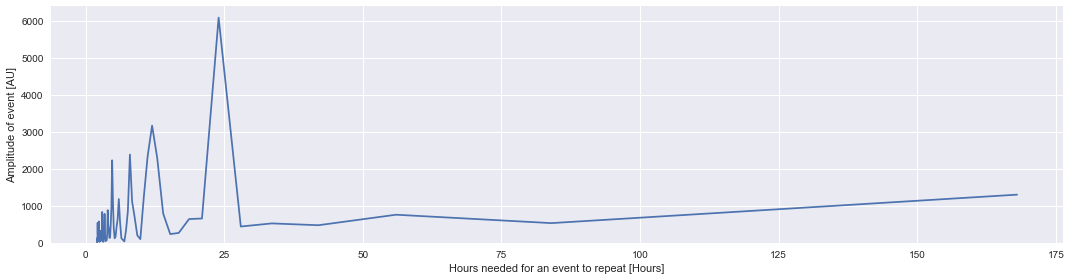

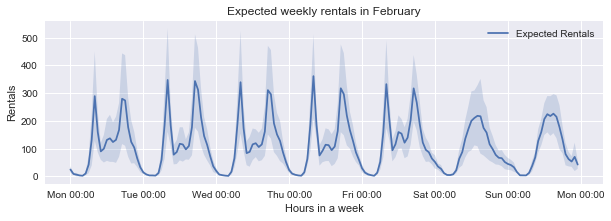

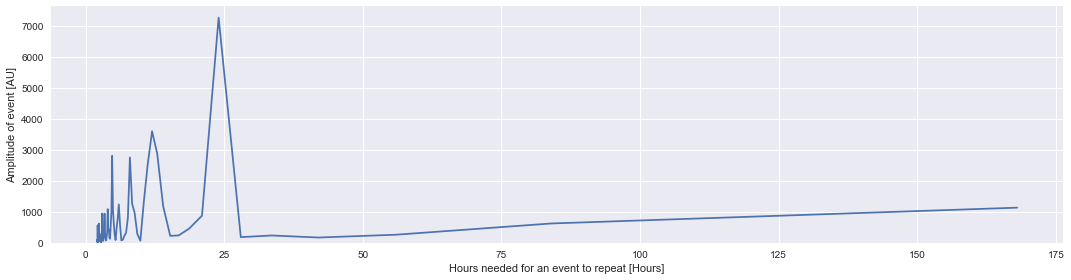

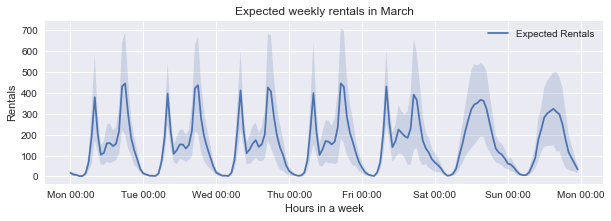

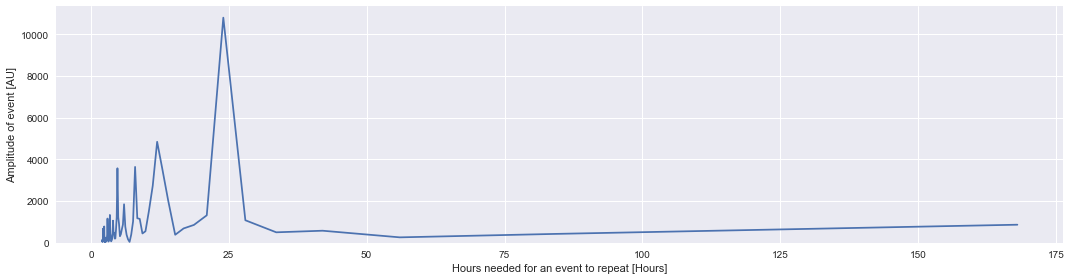

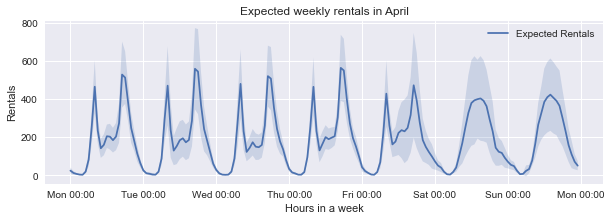

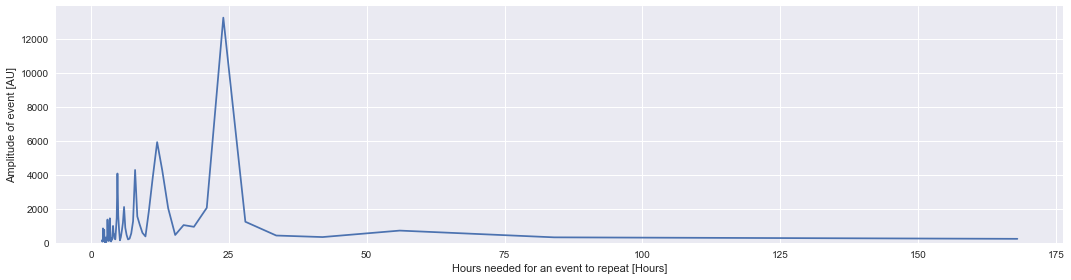

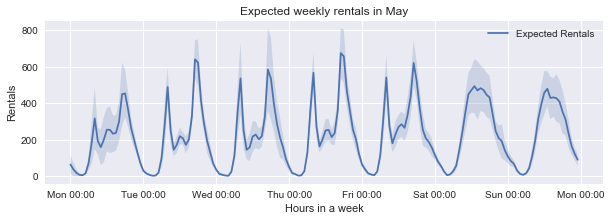

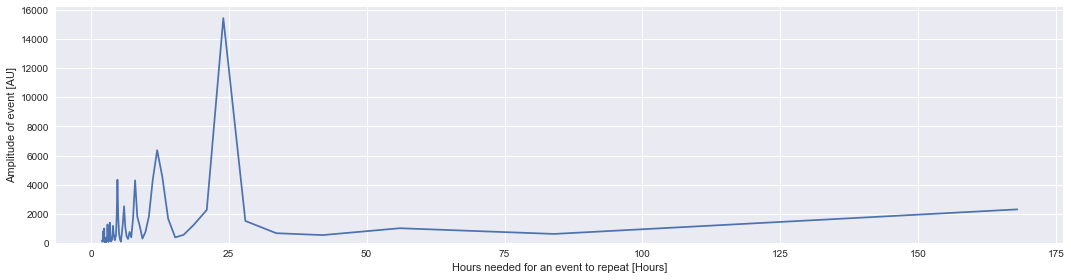

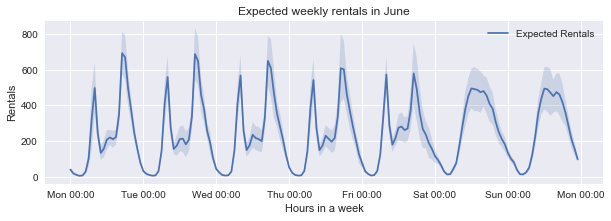

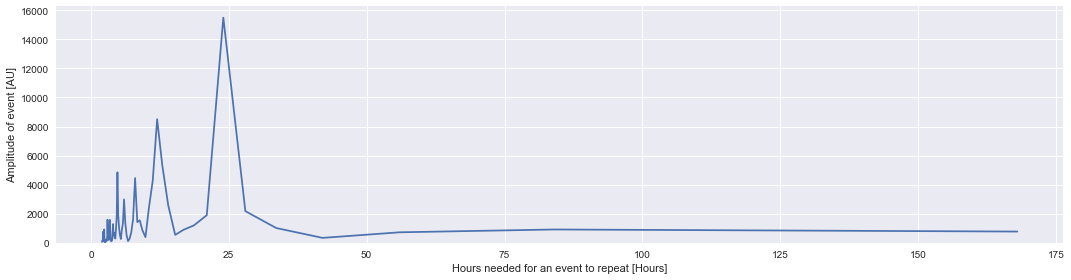

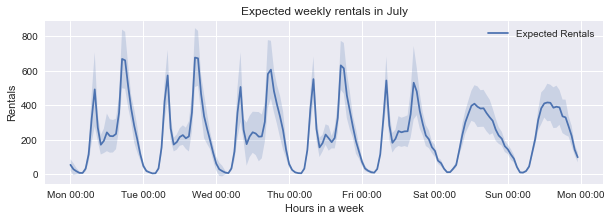

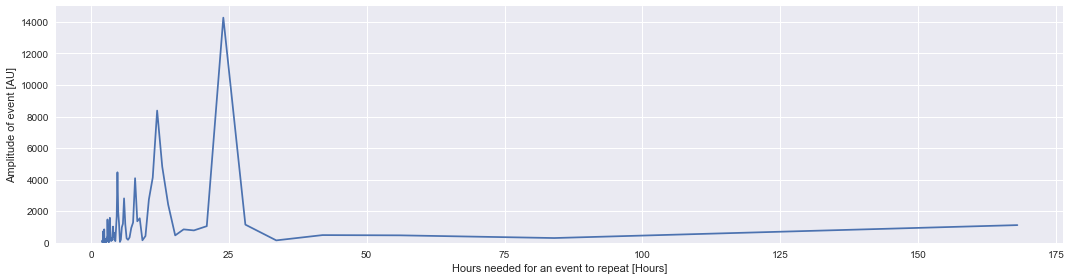

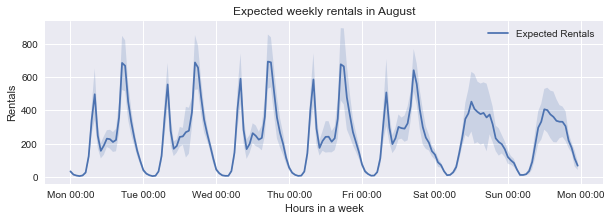

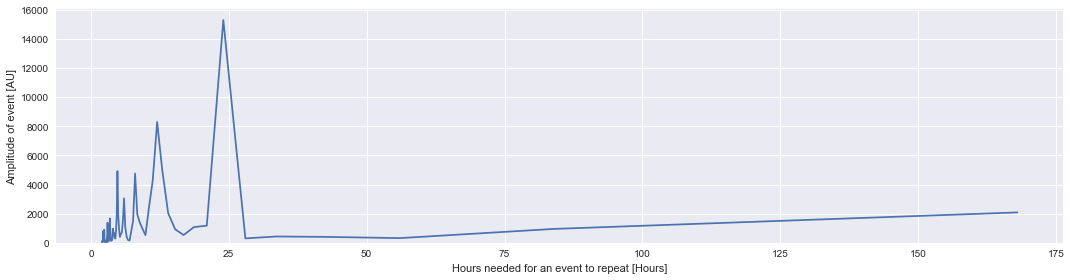

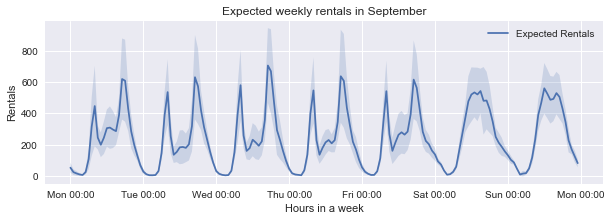

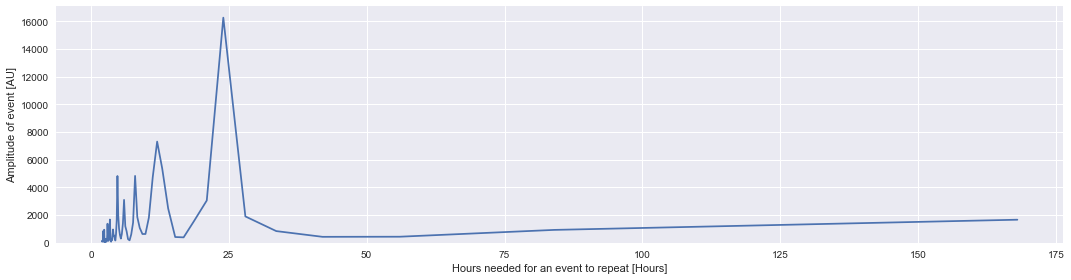

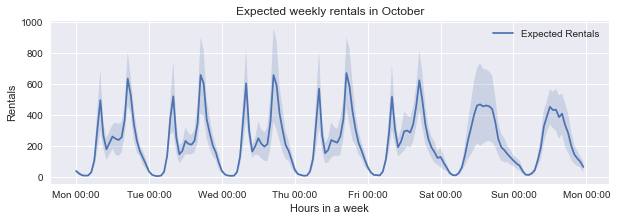

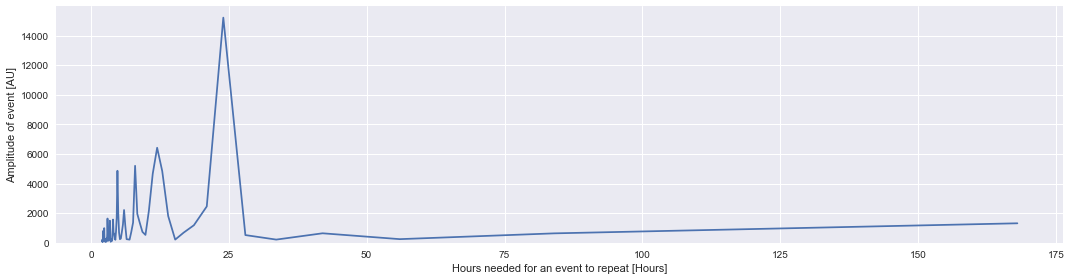

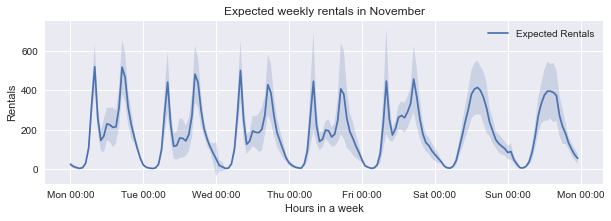

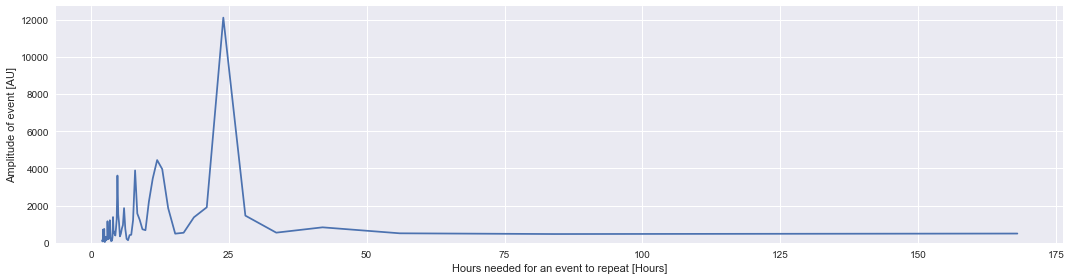

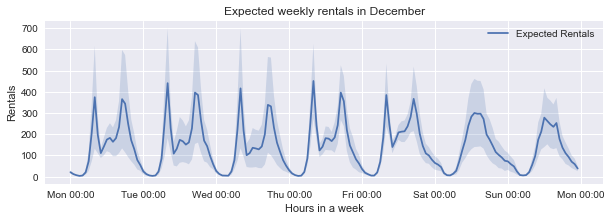

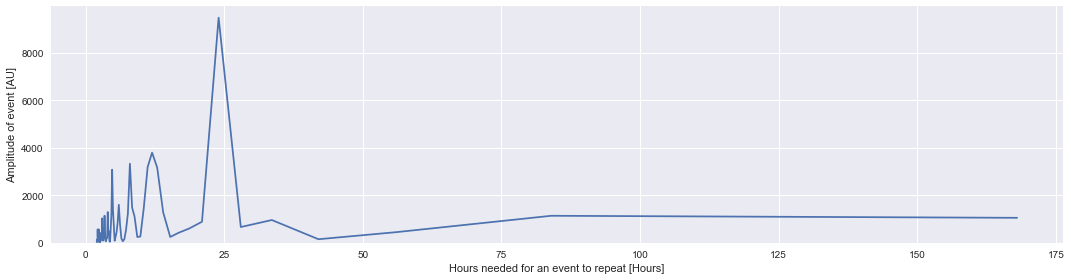

In [14]:
# To make sure that our findings are constant we can plot every month
# to check for outliers
for index in range (1,13):
    handler.forecast(index)

In [ ]:
# While we find higher rentals during summer months,
# the overall differences between workdays and weekends seem to persists.

In [15]:
# In conclusion, our findings suggest that:
# 1. More bikes should be made available with
#    increasing temperature and lower humidity.
# 2. Fewer bikes at night after midnight
# 3. More bike rentals during the summer months between May-September,
#    with a peak in August at around 175.000 per month.
# 4. Bike rentals seem to be cyclical with a high number of users
#    renting bikes in the morning and again in the evening
#    (most likely moving to and from work) with slight increases
#    again during lunch hours.
#    Weekends seem to follow a differnt patterns with only one peak 
#    during midday, following a steady concave function form.
# Our suggestion is therefore to use the increases in bike rentals in
# the monings and afternoons during the week to make as many bikes available
# as possible per shop to rent out, and use the work hours for maintenance
# and relocations. For weekends most shops should excect the highest demand 
# around midday.
# The increase from around 70.000 to 175.000 during May-September
# should be kept in mind, as well as the correlation with weather conditions.
# Further research should be done in highly used work routes to investigate
# if the rental influxes overlap to then better
# position the rental shops. For example, there might be a higher demand of
# rental bikes in residential districts in the morning,
# and a higher demand in commercial districts at evening hours.

In [16]:
# To get a short description of the class we can inspect 'Handler'
# using the help function.
help(Handler)

Help on class Handler in module handler:

class Handler(builtins.object)
 |  Defines class 'Handler' with seven methods.
 |  
 |  Attributes:
 |  -----------
 |  data_frame: pandas.DataFrame
 |      Pandas DataFrame as attribute of instance
 |  
 |  Methods:
 |  --------
 |  __init__():
 |      initializes the Class and sets the DataFrame as an attribute
 |  set_df(df_path):
 |      attributes the 'data_frame' to the instance
 |  download_url(url, save_path):
 |      downloads the Bike-Sharing-Dataset as a .zip file in 'downloads' file
 |  extract_zip(file_name):
 |      extract_zip: reads the .csv data in .zip file.
 |  create_correlation_matrix(correlation_attributes):
 |      create_correlation_matrix: plots a correlation matrix between the attributes given
 |  plot():
 |      allows input of specific week, which is then plotted and the selected data frame displayed
 |  plot_average_total_rentals():
 |      barplot expected rentals by month
 |  forecast(i_month):
 |      plots expec